# Homework 08 LSTM Stock Predictions

# Step 1. Import the data from the given .csv file (Google_Stock_Price_Train.csv (https://sjsu.instructure.com/courses/1585768/files/75906517/download?download_frd=1) ).

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


# Step 2. Preprocess the data as you see fit

In [4]:

df['Date'] = pd.to_datetime(df['Date'])

df['Volume'] = df['Volume'].str.replace(',', '').astype(int)
try:
    df['Close'] = df['Close'].str.replace(',', '').astype(float)
except ValueError as e:
    print(f"Error converting 'Close': {e}")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500
1,2012-01-04,331.27,333.87,329.08,666.45,5749400
2,2012-01-05,329.83,330.75,326.89,657.21,6590300
3,2012-01-06,328.34,328.77,323.68,648.24,5405900
4,2012-01-09,322.04,322.29,309.46,620.76,11688800


# Step 3. Split into 80% train 20% prediction

In [6]:
# Select the 'Close' column
data = df.filter(['Close'])
dataset = data.values

# Calculate the number of rows to use for training
training_data_len = int(np.ceil(len(dataset) * .80))

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
look_back = 10
x_train = []
y_train = []

for i in range(look_back, len(train_data)):
    x_train.append(train_data[i-look_back:i, 0])  # The 10 previous days' closing prices
    y_train.append(train_data[i, 0])  # The next day's closing price

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data into the shape accepted by the LSTM (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [7]:
data['Close'].max()


1216.83

In [8]:
data['Close'].min()

491.2

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.38559596],
       [0.36889324],
       [0.3454102 ]])

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=2)


Epoch 1/100
997/997 - 1s - loss: 0.0044 - 1s/epoch - 1ms/step
Epoch 2/100
997/997 - 1s - loss: 0.0024 - 961ms/epoch - 964us/step
Epoch 3/100
997/997 - 1s - loss: 0.0021 - 963ms/epoch - 966us/step
Epoch 4/100
997/997 - 1s - loss: 0.0015 - 963ms/epoch - 966us/step
Epoch 5/100
997/997 - 1s - loss: 0.0013 - 963ms/epoch - 965us/step
Epoch 6/100
997/997 - 1s - loss: 0.0013 - 963ms/epoch - 966us/step
Epoch 7/100
997/997 - 1s - loss: 0.0012 - 962ms/epoch - 964us/step
Epoch 8/100
997/997 - 1s - loss: 0.0012 - 965ms/epoch - 968us/step
Epoch 9/100
997/997 - 1s - loss: 0.0011 - 963ms/epoch - 966us/step
Epoch 10/100
997/997 - 1s - loss: 0.0011 - 961ms/epoch - 963us/step
Epoch 11/100
997/997 - 1s - loss: 0.0012 - 960ms/epoch - 962us/step
Epoch 12/100
997/997 - 1s - loss: 8.7047e-04 - 965ms/epoch - 968us/step
Epoch 13/100
997/997 - 1s - loss: 0.0013 - 960ms/epoch - 963us/step
Epoch 14/100
997/997 - 1s - loss: 0.0011 - 961ms/epoch - 964us/step
Epoch 15/100
997/997 - 1s - loss: 0.0011 - 958ms/epoch - 9

In [10]:

# Train predictions
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)

# Inverse transform the actual training values
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Calculate and print RMSE for the training set
train_rmse = sqrt(mean_squared_error(y_train_actual, train_predict))
print("Training RMSE:", train_rmse)



32/32 [==============================] - 0s 837us/step
Training RMSE: 20.76902866284766


In [11]:
# Prepare the test dataset
test_data = scaled_data[training_data_len - 10:, :]

x_test = []
y_test_actual = dataset[training_data_len:, 0]  # Adjust this if dataset's shape varies

for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])

# Convert x_test to a numpy array and reshape for LSTM
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict on the test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Ensure y_test_actual is properly reshaped for comparison
y_test_actual = y_test_actual.reshape(-1, 1)

# Calculate and print RMSE for the testing set
test_rmse = sqrt(mean_squared_error(y_test_actual, predictions))
print("Testing RMSE:", test_rmse)


8/8 [==============================] - 0s 845us/step
Testing RMSE: 9.448498845125759


Your LSTM model demonstrates promising results, with RMSE scores indicating reasonable accuracy against the backdrop of your data's price range. The lower testing RMSE compared to training suggests your model generalizes well, though it's slightly atypical and might merit a closer look to ensure the test set adequately reflects the data's complexity. Overall, considering the range of 'Close' prices, the performance seems satisfactory, with no immediate signs of overfitting. It's advisable to continue monitoring model performance, especially against unseen data, and consider adjusting the model or evaluation strategy as new data becomes available.

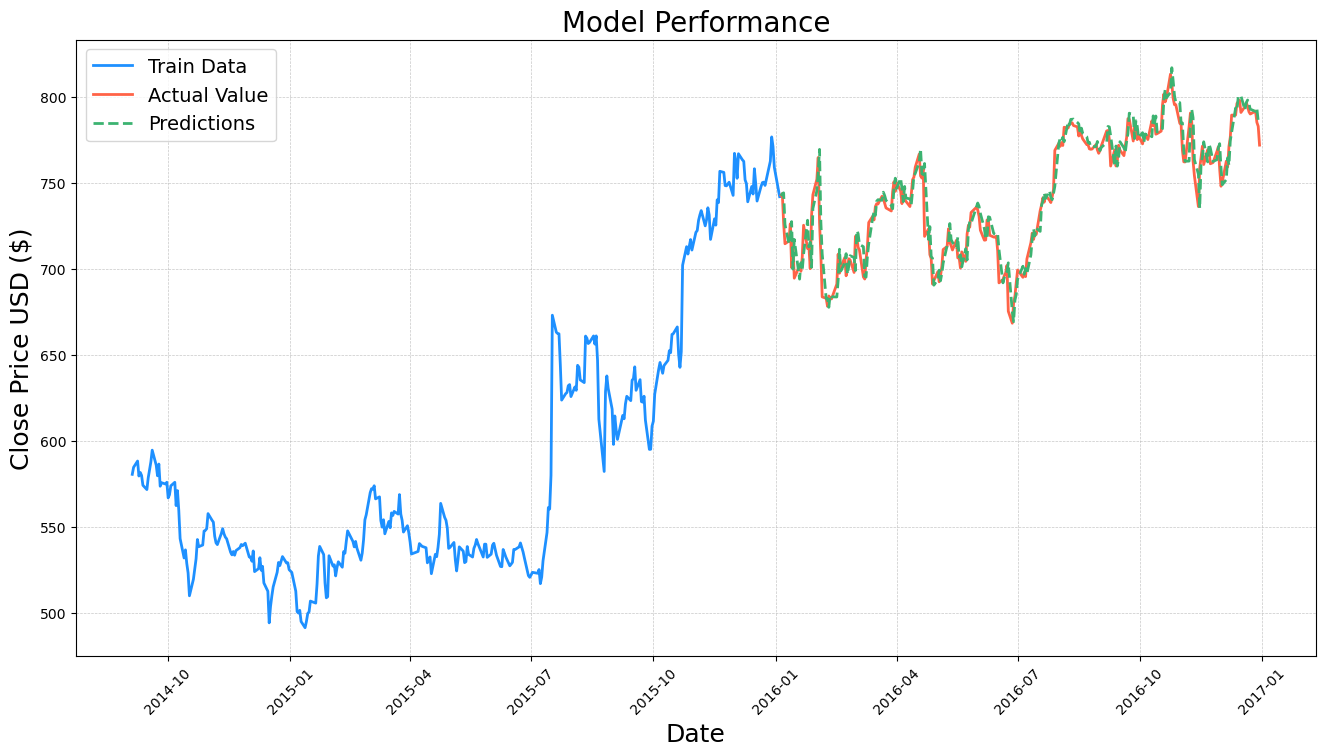

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'predictions' are already provided and scaled back to the original price range
# Assuming 'df' has columns 'Date' and 'Close'

# Setting up the 'train' DataFrame
train = df.iloc[int(training_data_len*2/3):training_data_len].copy()

# Preparing the 'valid' DataFrame
valid = df.iloc[training_data_len:].copy()
valid['Predictions'] = predictions.flatten()



# Plotting
plt.figure(figsize=(16,8))
plt.title('Model Performance', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Actual prices for the training part
plt.plot(train['Date'], train['Close'], label='Train Data', color='dodgerblue', linewidth=2)

# Actual prices for the test part
plt.plot(valid['Date'], valid['Close'], label='Actual Value', color='tomato', linewidth=2)

# Predicted prices
plt.plot(valid['Date'], valid['Predictions'], label='Predictions', color='mediumseagreen', linestyle='--', linewidth=2)

plt.legend(loc='upper left', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


SHapes = X.shape = (1243, 15, 1), y.shape = (1243, 1)
Training Data Size = torch.Size([994, 15, 1]), torch.Size([994, 1])
Test Data Size     = torch.Size([249, 15, 1]), torch.Size([249, 1])
10 epoch loss 0.064834245
20 epoch loss 0.052105613
30 epoch loss 0.038568646
40 epoch loss 0.021293774
50 epoch loss 0.00838993
60 epoch loss 0.007567591
70 epoch loss 0.0062846267
80 epoch loss 0.005019126
90 epoch loss 0.0044184616


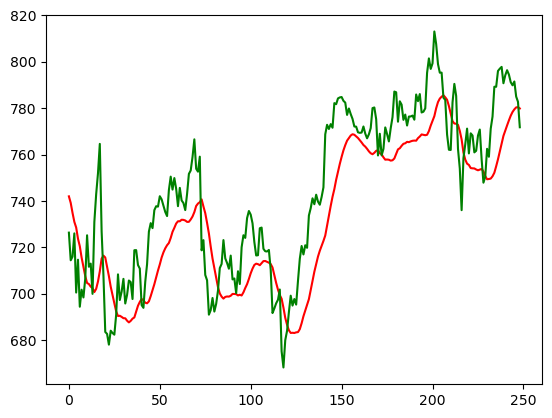

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

df = pd.read_csv("Google_Stock_Price_Train.csv")
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'])

closed_prices = df["Close"]

seq_len = 15

mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

X = []
y = []

for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i + seq_len])
    y.append(scaled_price[i + seq_len])
    
X = np.array(X)[... , None]
y = np.array(y)[... , None]
    
print(f"SHapes = {X.shape = }, {y.shape = }")

train_x = torch.from_numpy(X[:int(0.8 * X.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8 * X.shape[0])]).float()
test_x = torch.from_numpy(X[int(0.8 * X.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8 * X.shape[0]):]).float()

print(f"Training Data Size = {train_x.shape}, {train_y.shape}")
print(f"Test Data Size     = {test_x.shape}, {test_y.shape}")
    
class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])
model = Model(1 , 64)

optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

model.eval()
with torch.no_grad():
    output = model(test_x)

pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())








